# KNN实验作业
#####         Copyright © 2020 by Wangchuwen，2018202114. All rights reserved. 

## 一.装载数据集

In [1]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix  
from sklearn import datasets
#from skimage import exposure
import numpy as np
import imutils
import matplotlib.pyplot as plt  
#import cv2

In [2]:
# load the MNIST digits dataset
mnist = datasets.load_digits()
 
X = np.array(mnist.data)
Y = mnist.target
 
print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)


## 二.切割train、test数据集，比例7：3开

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)  


## 三.设定一个k比如7，训练KNN
显示train/test数据集上的混淆矩阵          PreYision/recall/f1 measure


In [4]:
classifier = KNeighborsClassifier(n_neighbors=7)  
classifier.fit(X_train, Y_train)
Y_pred1 = classifier.predict(X_test)
Y_pred2 = classifier.predict(X_train)
print(confusion_matrix(Y_test, Y_pred1))  
print(classification_report(Y_test, Y_pred1))
print(confusion_matrix(Y_train, Y_pred2))  
print(classification_report(Y_train, Y_pred2))  

[[57  0  0  0  1  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  0  1  0]
 [ 0  0  0 60  0  1  0  1  1  0]
 [ 0  0  0  0 45  0  0  1  1  0]
 [ 0  0  0  0  0 43  0  0  0  1]
 [ 0  0  0  0  0  0 59  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  2  0  1  0  0  0  0 47  0]
 [ 0  0  0  0  0  0  0  0  1 58]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       0.97      1.00      0.98        61
           2       1.00      0.98      0.99        51
           3       0.98      0.95      0.97        63
           4       0.98      0.96      0.97        47
           5       0.98      0.98      0.98        44
           6       1.00      1.00      1.00        59
           7       0.96      1.00      0.98        48
           8       0.92      0.94      0.93        50
           9       0.98      0.98      0.98        59

    accuracy                           0.98       540
   macro avg       


## 四.从3-20设定K，计算KNN在test集上的误差
   绘制一个折线图，横坐标为k，纵坐标为test上的误差率

In [5]:
error = []

# Calculating error for K values between 1 and 40
for i in range(3, 21):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
#error

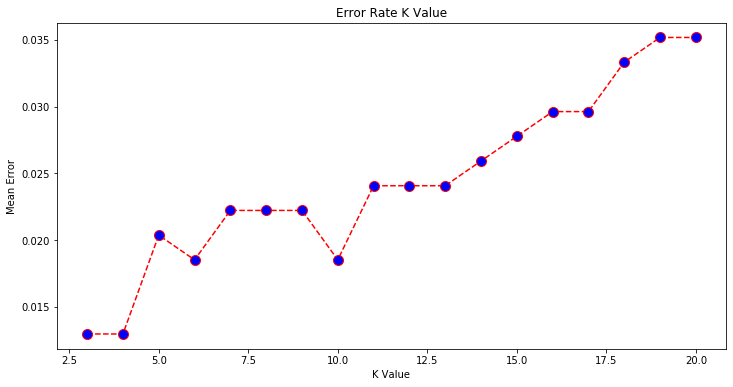

In [6]:
plt.figure(figsize=(12, 6))  
plt.plot(range(3, 21), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()